**21-03-23 ML_DL 07_딥러닝기초 mnist(손글씨 데이터) (c)cherryuki (ji)**

# 07. 딥러닝 기초 mnist(손글씨 데이터)

In [2]:
from tensorflow.keras.datasets import mnist #mnist 데이터셋
import tensorflow.keras.utils as utils #원핫인코딩
from tensorflow.keras.models import Sequential #모델
from tensorflow.keras.layers import Dense, Activation #model.add 시
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#1. 데이터셋 준비하기
##훈련셋, 검증셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

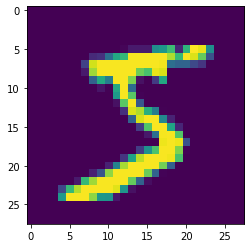

In [5]:
plt.imshow(X_train[0])

In [6]:
Y_train[0]

5

In [7]:
#훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [8]:
#훈련셋; model 학습시 사용
X_train.shape, Y_train.shape

((50000, 28, 28), (50000,))

In [9]:
#검증셋; model 학습시 사용
len(X_val), len(Y_val)

(10000, 10000)

In [10]:
#시험셋(test set); model 평가시 사용
len(X_test), len(Y_test)

(10000, 10000)

In [11]:
#1차원으로 바꾸고, scale 맞춰야 함
#normalize하기 위해 색상값(255.0)으로 나눔 #28*28=784
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(10000, 28*28).astype('float32') / 255.0

In [12]:
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [13]:
#훈련셋과 검증셋 700개, 300개씩 가져옴
train_rand_idx = np.random.choice(50000, 700)
val_rand_idx = np.random.choice(10000, 300)

X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]

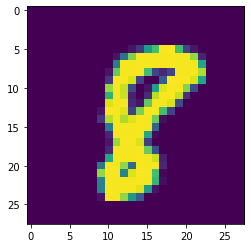

In [14]:
plt.imshow(X_train[0].reshape(28,28))

In [15]:
Y_train[0]

8

In [16]:
Y_train.shape, Y_val.shape, Y_test.shape

((700,), (300,), (10000,))

In [17]:
#원 핫 인코딩(라벨링 전환)
#1 -> 0 1 0 0 0 0 0 0 0 0
#9 -> 0 0 0 0 0 0 0 0 0 9
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

In [18]:
Y_train[0]
#데이터 전처리 완료

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## 1. 과적합(Overfitting) 발생

In [21]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy'])

#4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val,Y_val), verbose=0)

In [22]:
#5. 모델 학습과정 표시 및 평가
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

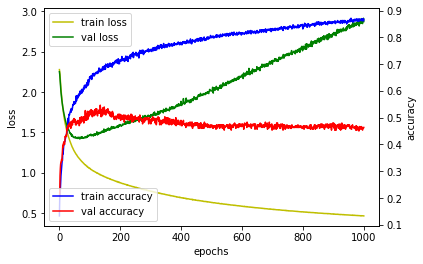

In [27]:
#학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() #x축을 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
#학습 데이터에서는 어느정도 loss도 줄고 accuracy도 증가하나 
##검증 데이터에서는 결과 좋지 못한 편(과적합 발생)

In [28]:
#모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 2.5514 - accuracy: 0.5089


In [29]:
print("loss:", loss_and_metrics[0])
print("accuracy:", loss_and_metrics[1])

loss: 2.5513694286346436
accuracy: 0.508899986743927


In [33]:
#6. 모델 저장 및 로드하기
model.save('model/mnist.h5')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [34]:
#모델 로드
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


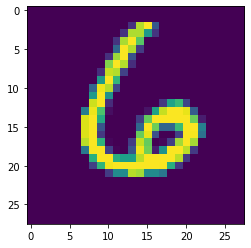

In [36]:
plt.imshow(X_train[5].reshape(28,28))

In [37]:
model2.predict(X_train[5].reshape(1,28*28)).argmax()

6

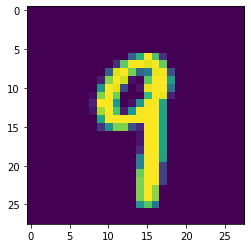

In [43]:
plt.imshow(X_val[2].reshape(28,28))

In [44]:
model2.predict(X_val[2].reshape(1,784)).argmax()

7

In [46]:
model2.predict_classes(X_val[2].reshape(1,784))

array([7], dtype=int64)

**21-03-24 ML_DL 07_딥러닝기초 mnist(손글씨 데이터) (c)cherryuki (ji)**

## 콜백함수
- epoch 실행할 때마다 자동으로 실행되는 함수

In [5]:
import tensorflow as tf
class CustomHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.train_loss=[]
        self.val_loss=[]
        self.train_acc=[]
        self.val_acc=[]
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch%10 == 0:
            print("epoch:{:3d}, loss:{}, val_loss:{}".format(self.epoch, 
                                                          logs.get('loss'), logs.get('val_loss')))
        self.epoch +=1
            
#1. 데이터셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
#1차원으로 바꾸고, scale 맞춰야 함
#normalize하기 위해 색상값(255.0)으로 나눔 #28*28=784
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0 
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#훈련셋과 검증셋 700개, 300개씩 가져옴
train_rand_idx = np.random.choice(50000, 700)
val_rand_idx = np.random.choice(10000, 300)
X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]
#라벨링 처리(원 핫 인코딩)
#1 => 0 1 0 0 0 0 0 0 0 0 
#9 => 0 0 0 0 0 0 0 0 0 1
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

#3. 모델학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#4. 모델 학습시키기
custom_hist = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10,
                 validation_data=(X_val, Y_val), verbose=0,
                 callbacks=[custom_hist])

epoch:  0, loss:2.3002989292144775, val_loss:2.2961931228637695
epoch: 10, loss:1.9269081354141235, val_loss:1.9438157081604004
epoch: 20, loss:1.6928579807281494, val_loss:1.7298184633255005
epoch: 30, loss:1.5415408611297607, val_loss:1.6021616458892822
epoch: 40, loss:1.434111475944519, val_loss:1.524446964263916
epoch: 50, loss:1.3631621599197388, val_loss:1.471590518951416
epoch: 60, loss:1.3064935207366943, val_loss:1.4377118349075317
epoch: 70, loss:1.2617461681365967, val_loss:1.4226945638656616
epoch: 80, loss:1.2228072881698608, val_loss:1.3983312845230103
epoch: 90, loss:1.1920177936553955, val_loss:1.3886382579803467
epoch:100, loss:1.1658549308776855, val_loss:1.3798907995224
epoch:110, loss:1.1383455991744995, val_loss:1.381088137626648
epoch:120, loss:1.1146395206451416, val_loss:1.3825284242630005
epoch:130, loss:1.0922274589538574, val_loss:1.3841112852096558
epoch:140, loss:1.072922706604004, val_loss:1.3867363929748535
epoch:150, loss:1.0515573024749756, val_loss:1.3

## 2. Early Stopping
### 2-1. 성급한 조기종료: EarlyStopping()
- val_loss값이 늘어나면 epoch를 다 수행하지 않고 조기 종료

Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.1953 - accuracy: 0.1729 - val_loss: 2.1292 - val_accuracy: 0.1833
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0958 - accuracy: 0.2457 - val_loss: 2.0435 - val_accuracy: 0.2233
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0239 - accuracy: 0.2843 - val_loss: 1.9797 - val_accuracy: 0.3300
Epoch 4/1000
70/70 [==============================] - 0s 997us/step - loss: 1.9673 - accuracy: 0.3114 - val_loss: 1.9255 - val_accuracy: 0.3467
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9214 - accuracy: 0.3200 - val_loss: 1.8831 - val_accuracy: 0.3600
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.8814 - accuracy: 0.3286 - val_loss: 1.8480 - val_accuracy: 0.3733
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.8469 - accuracy: 0.3400 - val_loss: 1.8175 - val_accuracy: 0.3733
Epoc

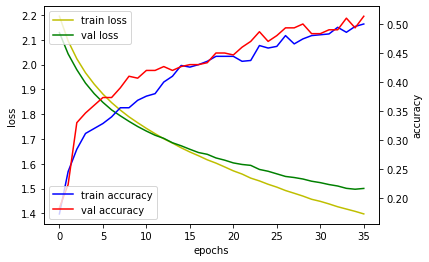

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
#1차원으로 바꾸고, scale 맞춰야 함
#normalize하기 위해 색상값(255.0)으로 나눔 #28*28=784
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0 
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#훈련셋과 검증셋 700개, 300개씩 가져옴
train_rand_idx = np.random.choice(50000, 700)
val_rand_idx = np.random.choice(10000, 300)
X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]
#라벨링 처리(원 핫 인코딩)
#1 => 0 1 0 0 0 0 0 0 0 0 
#9 => 0 0 0 0 0 0 0 0 0 1
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy'])
#4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10,
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping]) #val_loss가 늘어나게 되면 학습 조기종료 시킴(성급한 조기종료)

#5. 모델학습과정 표시하고 평가하기
#학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() #x축을 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
##val_loss가 증가하면 바로 학습이 종료됨(성급한 조기종료)

### 2-2. 적절한 조기종료: EarlyStopping(patience = num)
- patience: 개선 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려줄 지 지정
- 개선이 없는 에포크가 num번째 지속될 경우 학습 종료

Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2996 - accuracy: 0.1671 - val_loss: 2.2919 - val_accuracy: 0.1333
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2690 - accuracy: 0.1886 - val_loss: 2.2766 - val_accuracy: 0.1400
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2474 - accuracy: 0.1943 - val_loss: 2.2614 - val_accuracy: 0.1400
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2237 - accuracy: 0.1943 - val_loss: 2.2393 - val_accuracy: 0.1600
Epoch 5/1000
70/70 [==============================] - 0s 983us/step - loss: 2.1960 - accuracy: 0.1971 - val_loss: 2.2158 - val_accuracy: 0.1667
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1673 - accuracy: 0.2171 - val_loss: 2.1956 - val_accuracy: 0.1733
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1382 - accuracy: 0.2271 - val_loss: 2.1691 - val_accuracy: 0.1900
Epoc

70/70 [==============================] - 0s 2ms/step - loss: 1.4339 - accuracy: 0.4643 - val_loss: 1.5900 - val_accuracy: 0.3967
Epoch 59/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.4298 - accuracy: 0.4614 - val_loss: 1.5856 - val_accuracy: 0.3967
Epoch 60/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.4250 - accuracy: 0.4571 - val_loss: 1.5835 - val_accuracy: 0.4000
Epoch 61/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.4210 - accuracy: 0.4714 - val_loss: 1.5900 - val_accuracy: 0.3900
Epoch 62/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.4174 - accuracy: 0.4671 - val_loss: 1.5791 - val_accuracy: 0.4033
Epoch 63/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.4135 - accuracy: 0.4729 - val_loss: 1.5742 - val_accuracy: 0.3967
Epoch 64/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.4100 - accuracy: 0.4786 - val_loss: 1.5783 - val_accuracy: 0.3900
Epoch 65/1000

70/70 [==============================] - 0s 1ms/step - loss: 1.2819 - accuracy: 0.5271 - val_loss: 1.5469 - val_accuracy: 0.4167
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2812 - accuracy: 0.5314 - val_loss: 1.5388 - val_accuracy: 0.4167
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2779 - accuracy: 0.5286 - val_loss: 1.5413 - val_accuracy: 0.4233
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2768 - accuracy: 0.5343 - val_loss: 1.5390 - val_accuracy: 0.4133
Epoch 119/1000
70/70 [==============================] - 0s 983us/step - loss: 1.2750 - accuracy: 0.5329 - val_loss: 1.5409 - val_accuracy: 0.4100


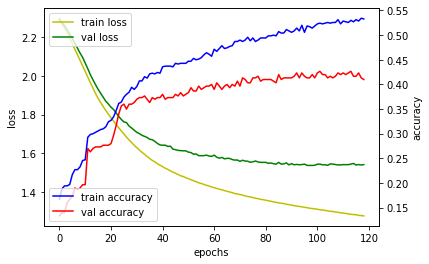

In [9]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
#1차원으로 바꾸고, scale 맞춰야 함
#normalize하기 위해 색상값(255.0)으로 나눔 #28*28=784
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0 
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#훈련셋과 검증셋 700개, 300개씩 가져옴
train_rand_idx = np.random.choice(50000, 700)
val_rand_idx = np.random.choice(10000, 300)
X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]
#라벨링 처리(원 핫 인코딩)
#1 => 0 1 0 0 0 0 0 0 0 0 
#9 => 0 0 0 0 0 0 0 0 0 1
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy'])
#4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20) #patience=수 만큼 val_loss 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10,
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

#5. 모델학습과정 표시하고 평가하기
#학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() #x축을 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [10]:
#6. 모델 평가하기
loss_and_matrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics:', loss_and_matrics)

313/313 [==============================] - 0s 1ms/step - loss: 1.5589 - accuracy: 0.4191

loss_and_metrics: [1.5589042901992798, 0.41909998655319214]


## 3. 상기 모델(DNN)의 accuracy 늘리기
<ol>
<li>많은 데이터 확보</li>
<li>레이어</li>
<li>활성화 함수: 은닉층에는 주로 relu, elu <br>
    output layer에는 sigmoid(이진분류), softmax(다중분류)</li>
<li>optimizer, epoch 등을 조정</li>
</ol>

In [11]:
#1. 데이터셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
#1차원으로 바꾸고, scale 맞춰야 함
#normalize하기 위해 색상값(255.0)으로 나눔 #28*28=784
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0 
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#훈련셋과 검증셋 700개, 300개씩 가져옴 ###데이터 양 늘리기 위해 주석 처리###
# train_rand_idx = np.random.choice(50000, 700)
# val_rand_idx = np.random.choice(10000, 300)
# X_train = X_train[train_rand_idx]
# Y_train = Y_train[train_rand_idx]
# X_val = X_val[val_rand_idx]
# Y_val = Y_val[val_rand_idx]
#라벨링 처리(원 핫 인코딩)
#1 => 0 1 0 0 0 0 0 0 0 0 
#9 => 0 0 0 0 0 0 0 0 0 1
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=256, input_dim=784, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
#4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping() #성급한 조기종료
early_stopping = EarlyStopping(patience=10) #patience=수 만큼 val_loss 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=20, batch_size=10,
                validation_data = (X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

Epoch 1/20
5000/5000 [==============================] - 42s 8ms/step - loss: 0.2236 - accuracy: 0.9311 - val_loss: 0.1141 - val_accuracy: 0.9686
Epoch 2/20
5000/5000 [==============================] - 41s 8ms/step - loss: 0.1136 - accuracy: 0.9661 - val_loss: 0.1006 - val_accuracy: 0.9729
Epoch 3/20
5000/5000 [==============================] - 40s 8ms/step - loss: 0.0846 - accuracy: 0.9752 - val_loss: 0.1058 - val_accuracy: 0.9714
Epoch 4/20
5000/5000 [==============================] - 41s 8ms/step - loss: 0.0685 - accuracy: 0.9800 - val_loss: 0.1016 - val_accuracy: 0.9727
Epoch 5/20
5000/5000 [==============================] - 40s 8ms/step - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.1044 - val_accuracy: 0.9752
Epoch 6/20
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.1157 - val_accuracy: 0.9748
Epoch 7/20
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0459 - accuracy: 0.9875 - val_loss: 0.1006 - val_ac

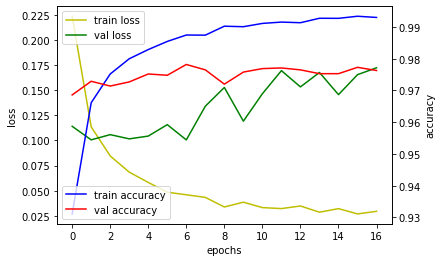

In [12]:
#5. 모델학습과정 표시하고 평가하기
#학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() #x축을 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [13]:
#6. 모델 평가하기
loss_and_matrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics:', loss_and_matrics)

313/313 [==============================] - 2s 5ms/step - loss: 0.1924 - accuracy: 0.9750

loss_and_metrics: [0.19236430525779724, 0.9750000238418579]


In [15]:
#7. 모델 사용하기
idx = np.random.choice(X_test.shape[0],5)
xhat = X_test[idx]
yhat = model.predict(xhat)

In [16]:
np.argmax(yhat,axis=1) #예측값

array([3, 9, 2, 1, 7], dtype=int64)

In [17]:
np.argmax(Y_test[idx], axis=1) #실제 값

array([3, 9, 2, 1, 7], dtype=int64)

In [19]:
for i in range(len(yhat)):
    print(i, "번째 실제값:", np.argmax(Y_test[idx[i]]), '\t예측값:', np.argmax(yhat[i]))

0 번째 실제값: 3 	예측값: 3
1 번째 실제값: 9 	예측값: 9
2 번째 실제값: 2 	예측값: 2
3 번째 실제값: 1 	예측값: 1
4 번째 실제값: 7 	예측값: 7


In [20]:
#8. 모델 저장하기
model.save('model/mnist.h5')

In [21]:
#9. 모델 재사용하기
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.predict_classes(xhat)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 9, 2, 1, 7], dtype=int64)